## Working with GARS in Vgrid DGGS

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeoshub/vgrid/blob/main/docs/notebooks/16_gars.ipynb)
[![image](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/opengeoshub/vgrid/HEAD?filepath=docs/notebooks/16_gars.ipynb)
[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeoshub/vgrid/blob/main/docs/notebooks/16_gars.ipynb)
[![image](https://jupyterlite.rtfd.io/en/latest/_static/badge.svg)](https://demo.gishub.vn/lab/index.html?path=notebooks/vgrid/16_gars.ipynb)

Full Vgrid DGGS documentation is available at [vgrid document](https://vgrid.gishub.vn).

To work with Vgrid DGGS directly in GeoPandas and Pandas, please use [vgridpandas](https://pypi.org/project/vgridpandas/). Full Vgridpandas DGGS documentation is available at [vgridpandas document](https://vgridpandas.gishub.vn).

To work with Vgrid DGGS in QGIS, install the [Vgrid Plugin](https://plugins.qgis.org/plugins/vgridtools/).

To visualize DGGS in Maplibre GL JS, try the [vgrid-maplibre](https://www.npmjs.com/package/vgrid-maplibre) library.

For an interactive demo, visit the [Vgrid Homepage](https://vgrid.vn).

### Install vgrid
Uncomment the following line to install [vgrid](https://pypi.org/project/vgrid/).

In [1]:
# %pip install vgrid --upgrade

### latlon2gars

In [2]:
from vgrid.conversion.latlon2dggs import latlon2gars

lat = 10.775276
lon = 106.706797
res = 3
gars_id = latlon2gars(lat, lon, res)
gars_id

'574JK19'

### GARS to Shapely Polygon

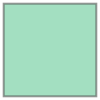

In [3]:
from vgrid.conversion.dggs2geo.gars2geo  import gars2geo

gars_geo = gars2geo(gars_id)
gars_geo

### GARS to GeoJSON        

In [4]:
from vgrid.conversion.dggs2geo.gars2geo import gars2geojson

gars_geojson = gars2geojson(gars_id)
gars_geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': (((106.75, 10.75),
      (106.75, 10.833333333333334),
      (106.66666666666667, 10.833333333333334),
      (106.66666666666667, 10.75),
      (106.75, 10.75)),)},
   'properties': {'gars': '574JK19',
    'resolution': 3,
    'center_lat': 10.7916667,
    'center_lon': 106.7083333,
    'cell_width': 9114.885,
    'cell_height': 9217.768,
    'cell_area': 84007349.416,
    'cell_perimeter': 36662.795}}]}

### GARS Generator

Generating GARS DGGS: 6 cells [00:00, 2379.75 cells/s]


<Axes: >

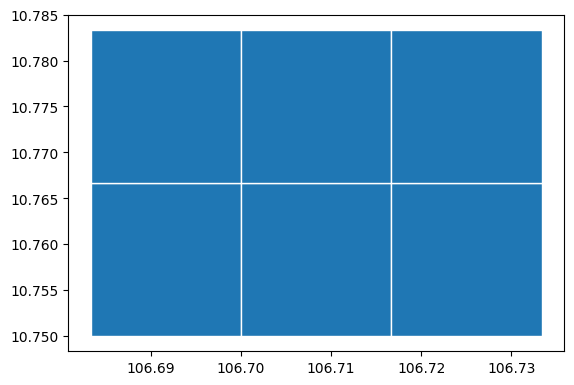

In [5]:
from vgrid.generator.garsgrid import garsgrid
gars_grid = garsgrid(resolution=4,bbox=[106.699007, 10.762811, 106.717674, 10.778649],output_format="gpd")
gars_grid.plot(edgecolor="white")

### GARS Inspect

In [6]:
from vgrid.stats.garsstats import garsinspect 
resolution = 1
gars_inspect = garsinspect(resolution)    
gars_inspect.head()

Generating GARS DGGS: 100%|██████████| 259200/259200 [00:38<00:00, 6767.27 cells/s]


gars  resolution  center_lat  center_lon  cell_width  cell_height  \
0  001AA           1      -89.75     -179.75       0.000    55846.975   
1  001AB           1      -89.25     -179.75     487.349    55846.889   
2  001AC           1      -88.75     -179.75     974.660    55846.718   
3  001AD           1      -88.25     -179.75    1461.896    55846.460   
4  001AE           1      -87.75     -179.75    1949.018    55846.116   

      cell_area  cell_perimeter  \
0  1.360844e+07      112181.300   
1  4.082421e+07      113155.788   
2  6.803661e+07      114129.991   
3  9.524342e+07      115103.833   
4  1.224424e+08      116077.238   

                                            geometry  crossed  norm_area  \
0  POLYGON ((-179.5 -90, -179.5 -89.5, -180 -89.5...    False   0.006915   
1  POLYGON ((-179.5 -89.5, -179.5 -89, -180 -89, ...    False   0.020746   
2  POLYGON ((-179.5 -89, -179.5 -88.5, -180 -88.5...    False   0.034574   
3  POLYGON ((-179.5 -88.5, -179.5 -88, -180 -88, ...    False   0.048400   
4  POLYGON ((-179.5 -88, -179.5 -87.5, -180 -87.5...    False   0.062222   

        ipq       zsc  
0  0.013589  0.116571  
1  0.040066  0.200164  
2  0.065638  0.256198  
3  0.090337  0.300561  
4  0.114195  0.337928

### Distribution of GARS Area Distortions

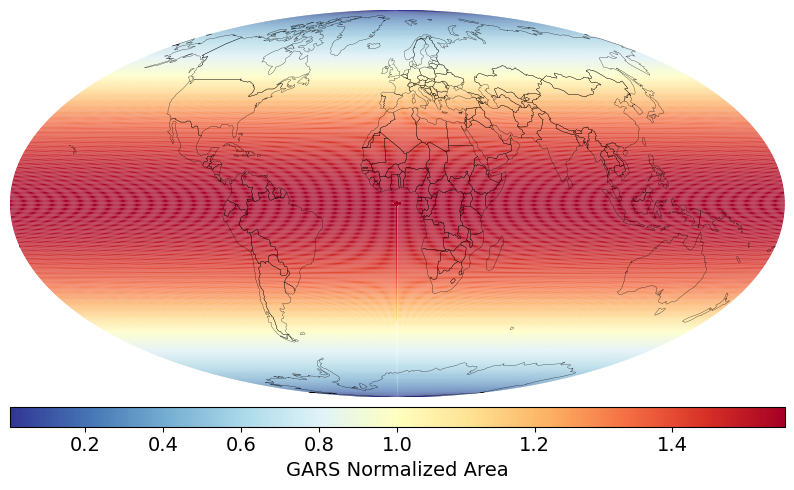

In [7]:
from vgrid.stats.garsstats import gars_norm_area
gars_norm_area(gars_inspect)

### Distribution of GARS IPQ Compactness

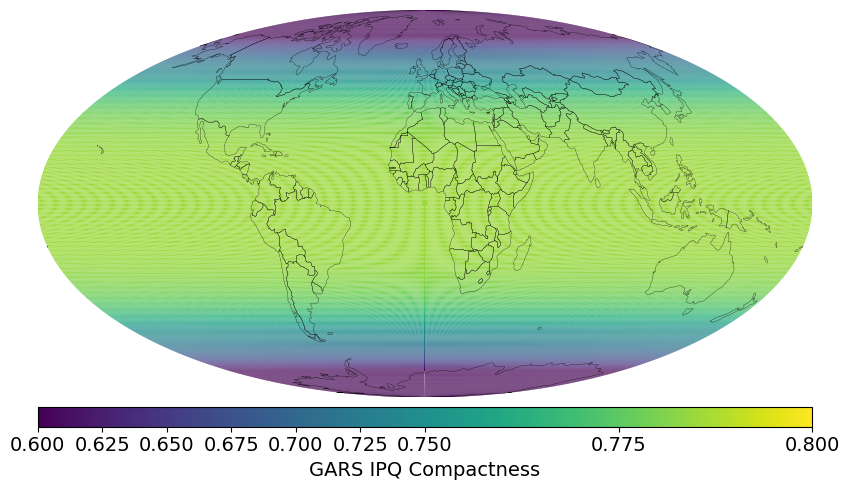

In [8]:
from vgrid.stats.garsstats import gars_compactness
gars_compactness(gars_inspect)

### GARS Statistics

In [9]:
from vgrid.stats import garsstats            
garsstats('km')

resolution  number_of_cells  avg_edge_len_km  avg_cell_area_km2
0           1           259200        44.360408        1967.845775
1           2          1036800        22.180204         491.961444
2           3          9331200         7.393401          54.662383
3           4        233280000         1.478680           2.186495